## I) Packages et fonctions

In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

#sklearn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score ,StratifiedKFold,learning_curve , GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

#Classifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn_evaluation import plot

#Web request
import requests
import io

#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor

from keras.models import Sequential
from keras.layers import Dense

In [3]:
def svm_f_importances(coef_svm , names):
    '''
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :

    - coef_svm : Les coéfficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]

    - names : est le nom des features que vous avez utilisée.
      ATTENTION à passer dans le même ordre que pour l'entrainement du modèle

    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

In [4]:
#Fonction de visualisation de la qualité d'un modèle

def evaluate_model(model, X_test, y_test):
    # On prédit les valeurs de la variable cible pour les données de test
    y_pred = model.predict(X_test)

    # On calcule l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % accuracy)

    # On calcule la matrice de confusion
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")

    # On calcule le rapport de classification

    report = classification_report(y_test, y_pred)
    print(report)
    return None

## II) Importation + nettoyage de la base

## Données

| Attribut        | Description                                                          |
|-----------------|----------------------------------------------------------------------|
| classes   | edible=e, poisonous=p |
| cap-shape            | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s                          |
| cap-surface     | fibrous=f,grooves=g,scaly=y,smooth=s      |
| cap-color        | brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y                   |
| bruises              | bruises=t,no=f                 |
| odor          | almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s                      |
| gill-attachment      | attached=a,descending=d,free=f,notched=n                         |
| gill-spacing           | close=c,crowded=w,distant=d               |
| gill-size       | broad=b,narrow=n                         |
| gill-color         | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y                       |
| stalk-shape              | enlarging=e,tapering=t               |
| stalk-root       | bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?                     |
| stalk-surface-above-ring        | fibrous=f,scaly=y,silky=k,smooth=s                                     |
| stalk-surface-below-ring             | fibrous=f,scaly=y,silky=k,smooth=s                          |
| stalk-color-above-ring            | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y           |
| stalk-color-below-ring            | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y                 |
| veil-type       | partial=p,universal=u |
| veil-color       | brown=n,orange=o,white=w,yellow=y                 |
| ring-number    | none=n,one=o,two=t             |
| ring-type            | cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z                 |
| spore-print-color     | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y |
| population     | abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y |
| habitat     | grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d |

In [5]:
# Assuming the uploaded file is a CSV file with mixed separators
df = pd.read_csv("P:/Mathis/MASTER 2/S1/SVM et réseaux de neurones/Python/Projet/mushrooms.csv", sep =";")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.dtypes
# Nous avons 23 variables qualitatives dont la variable à expliquer "class"

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [8]:
# On transforme les variables en dummies pour les modèles
nominalColumns = df.select_dtypes(include='category').columns
dfEncoded = df.copy()

# encoder les variables catégorielles
dfEncoded = pd.get_dummies(df, columns=nominalColumns, drop_first=True)

dfEncoded.info()
dfEncoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class_p                     8124 non-null   bool 
 1   cap-shape_c                 8124 non-null   bool 
 2   cap-shape_f                 8124 non-null   bool 
 3   cap-shape_k                 8124 non-null   bool 
 4   cap-shape_s                 8124 non-null   bool 
 5   cap-shape_x                 8124 non-null   bool 
 6   cap-surface_g               8124 non-null   bool 
 7   cap-surface_s               8124 non-null   bool 
 8   cap-surface_y               8124 non-null   bool 
 9   cap-color_c                 8124 non-null   bool 
 10  cap-color_e                 8124 non-null   bool 
 11  cap-color_g                 8124 non-null   bool 
 12  cap-color_n                 8124 non-null   bool 
 13  cap-color_p                 8124 non-null   bool 
 14  cap-colo

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
# Recodage des variables en 0-1
for col in dfEncoded.columns:
    if dfEncoded[col].dtype == 'bool':
        dfEncoded[col] = dfEncoded[col].astype('int32')

In [10]:
dfEncoded.sample(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3618,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4152,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7173,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6912,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3514,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## III) Quelques statistiques descritives

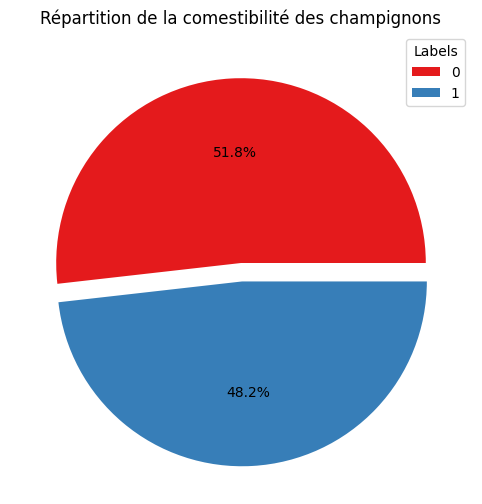

In [11]:
#Graphique qui représente la proportion de la comestibilité des champignons
champ_class = dfEncoded["class_p"].value_counts()

champ_class.plot(kind='pie',
                        figsize=(10, 6),
                        title ="Répartition de la comestibilité des champignons",
                        autopct='%1.1f%%',
                        colors=["#e41a1c","#377eb8"],
                        explode = (0, 0.1),
                        labels = None
                        )
plt.legend(champ_class.index, title="Labels", loc="upper right")
plt.axis("off")
plt.show()

Les modalités de la variable à expliquer sont très bien réparties avec 48% de champignons venimeux et 52% qui ne le sont pas. Il n'y aura pas besoin de rééchantilloner la variable.

In [12]:
from scipy.stats import chi2_contingency

category_columns = df.select_dtypes(include='object').columns

# Créez un DataFrame avec seulement ces colonnes
df_category = df[category_columns]

# Initialisez une liste pour stocker les résultats des tests du chi-deux
chi2_results = []

# Spécifiez le seuil de p-value
alpha = 0.05

# Bouclez sur chaque paire de colonnes
for i in range(len(df_category.columns)):
    for j in range(i+1, len(df_category.columns)):  # Commencez à j+1 pour éviter les duplicatas
        col1, col2 = df_category.columns[i], df_category.columns[j]
        
        # Créez un tableau de contingence pour le test du chi-deux
        contingency_table = pd.crosstab(df_category[col1], df_category[col2])
        
        # Effectuez le test du chi-deux
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Vérifiez si la p-value est inférieure au seuil spécifié
        if p < alpha:
            # Stockez les résultats dans la liste
            chi2_results.append({
                'Variable1': col1,
                'Variable2': col2,
                'P-value': p
            })

# Créez un DataFrame à partir des résultats
chi2_results_df = pd.DataFrame(chi2_results)
# chi2_results_df.to_csv('chi2_results.csv', index=False, sep =";")

On a de fortes corrélations entre les variables explicatives et la variable à expliquer. Il y a aussi une forte corrélation entre les variables explicatives. On va donc représenter graphiquement les modalités des variables pour mieux comprendre ces résultats.

In [13]:
# Repartition des modalités des variables qualitatives avec plotly 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=8, cols=3,
                    subplot_titles=('cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                'stalk-surface-below-ring', 'stalk-color-above-ring',
                                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                                'ring-type', 'spore-print-color', 'population', 'habitat')
)

fig.add_trace(go.Bar(x=df['cap-shape'].value_counts().index,
                        y=df['cap-shape'].value_counts().values),
                row=1, col=1)

fig.add_trace(go.Bar(x=df['cap-surface'].value_counts().index,
                        y=df['cap-surface'].value_counts().values),
                row=1, col=2)

fig.add_trace(go.Bar(x=df['cap-color'].value_counts().index,
                        y=df['cap-color'].value_counts().values),
                row=1, col=3)

fig.add_trace(go.Bar(x=df['bruises'].value_counts().index,
                        y=df['bruises'].value_counts().values),
                row=2, col=1)

fig.add_trace(go.Bar(x=df['odor'].value_counts().index,
                        y=df['odor'].value_counts().values),
                row=2, col=2)

fig.add_trace(go.Bar(x=df['gill-attachment'].value_counts().index,
                        y=df['gill-attachment'].value_counts().values),
                row=2, col=3)

fig.add_trace(go.Bar(x=df['gill-spacing'].value_counts().index,
                        y=df['gill-spacing'].value_counts().values),
                row=3, col=1)

fig.add_trace(go.Bar(x=df['gill-size'].value_counts().index,
                        y=df['gill-size'].value_counts().values),
                row=3, col=2)

fig.add_trace(go.Bar(x=df['gill-color'].value_counts().index,
                        y=df['gill-color'].value_counts().values),
                row=3, col=3)

fig.add_trace(go.Bar(x=df['stalk-shape'].value_counts().index,
                        y=df['stalk-shape'].value_counts().values),
                row=4, col=1)

fig.add_trace(go.Bar(x=df['stalk-root'].value_counts().index,
                        y=df['stalk-root'].value_counts().values),
                row=4, col=2)

fig.add_trace(go.Bar(x=df['stalk-surface-above-ring'].value_counts().index,
                        y=df['stalk-surface-above-ring'].value_counts().values),
                row=4, col=3)

fig.add_trace(go.Bar(x=df['stalk-surface-below-ring'].value_counts().index,
                        y=df['stalk-surface-below-ring'].value_counts().values),
                row=5, col=1)

fig.add_trace(go.Bar(x=df['stalk-color-above-ring'].value_counts().index,
                        y=df['stalk-color-above-ring'].value_counts().values),
                row=5, col=2)

fig.add_trace(go.Bar(x=df['stalk-color-below-ring'].value_counts().index,
                        y=df['stalk-color-below-ring'].value_counts().values),
                row=5, col=3)

fig.add_trace(go.Bar(x=df['veil-type'].value_counts().index,
                        y=df['veil-type'].value_counts().values),
                row=6, col=1)

fig.add_trace(go.Bar(x=df['veil-color'].value_counts().index,
                        y=df['veil-color'].value_counts().values),
                row=6, col=2)

fig.add_trace(go.Bar(x=df['ring-number'].value_counts().index,
                        y=df['ring-number'].value_counts().values),
                row=6, col=3)

fig.add_trace(go.Bar(x=df['ring-type'].value_counts().index,
                        y=df['ring-type'].value_counts().values),
                row=7, col=1)

fig.add_trace(go.Bar(x=df['spore-print-color'].value_counts().index,
                        y=df['spore-print-color'].value_counts().values),
                row=7, col=2)

fig.add_trace(go.Bar(x=df['population'].value_counts().index,
                        y=df['population'].value_counts().values),
                row=7, col=3)

fig.add_trace(go.Bar(x=df['habitat'].value_counts().index,
                        y=df['habitat'].value_counts().values),
                row=8, col=1)

fig.update_layout(height=1300, width=1000,
                 title_text="Repartition des modalités des variables qualitatives",
                 title_x=0.5,
                 showlegend=False)

fig.show()

On comprend donc mieux la forte corrélation entre les variables. En effet, elles sont très déséquilibrées dans leurs modalités ce qui implique une forte corrélation entre elles.

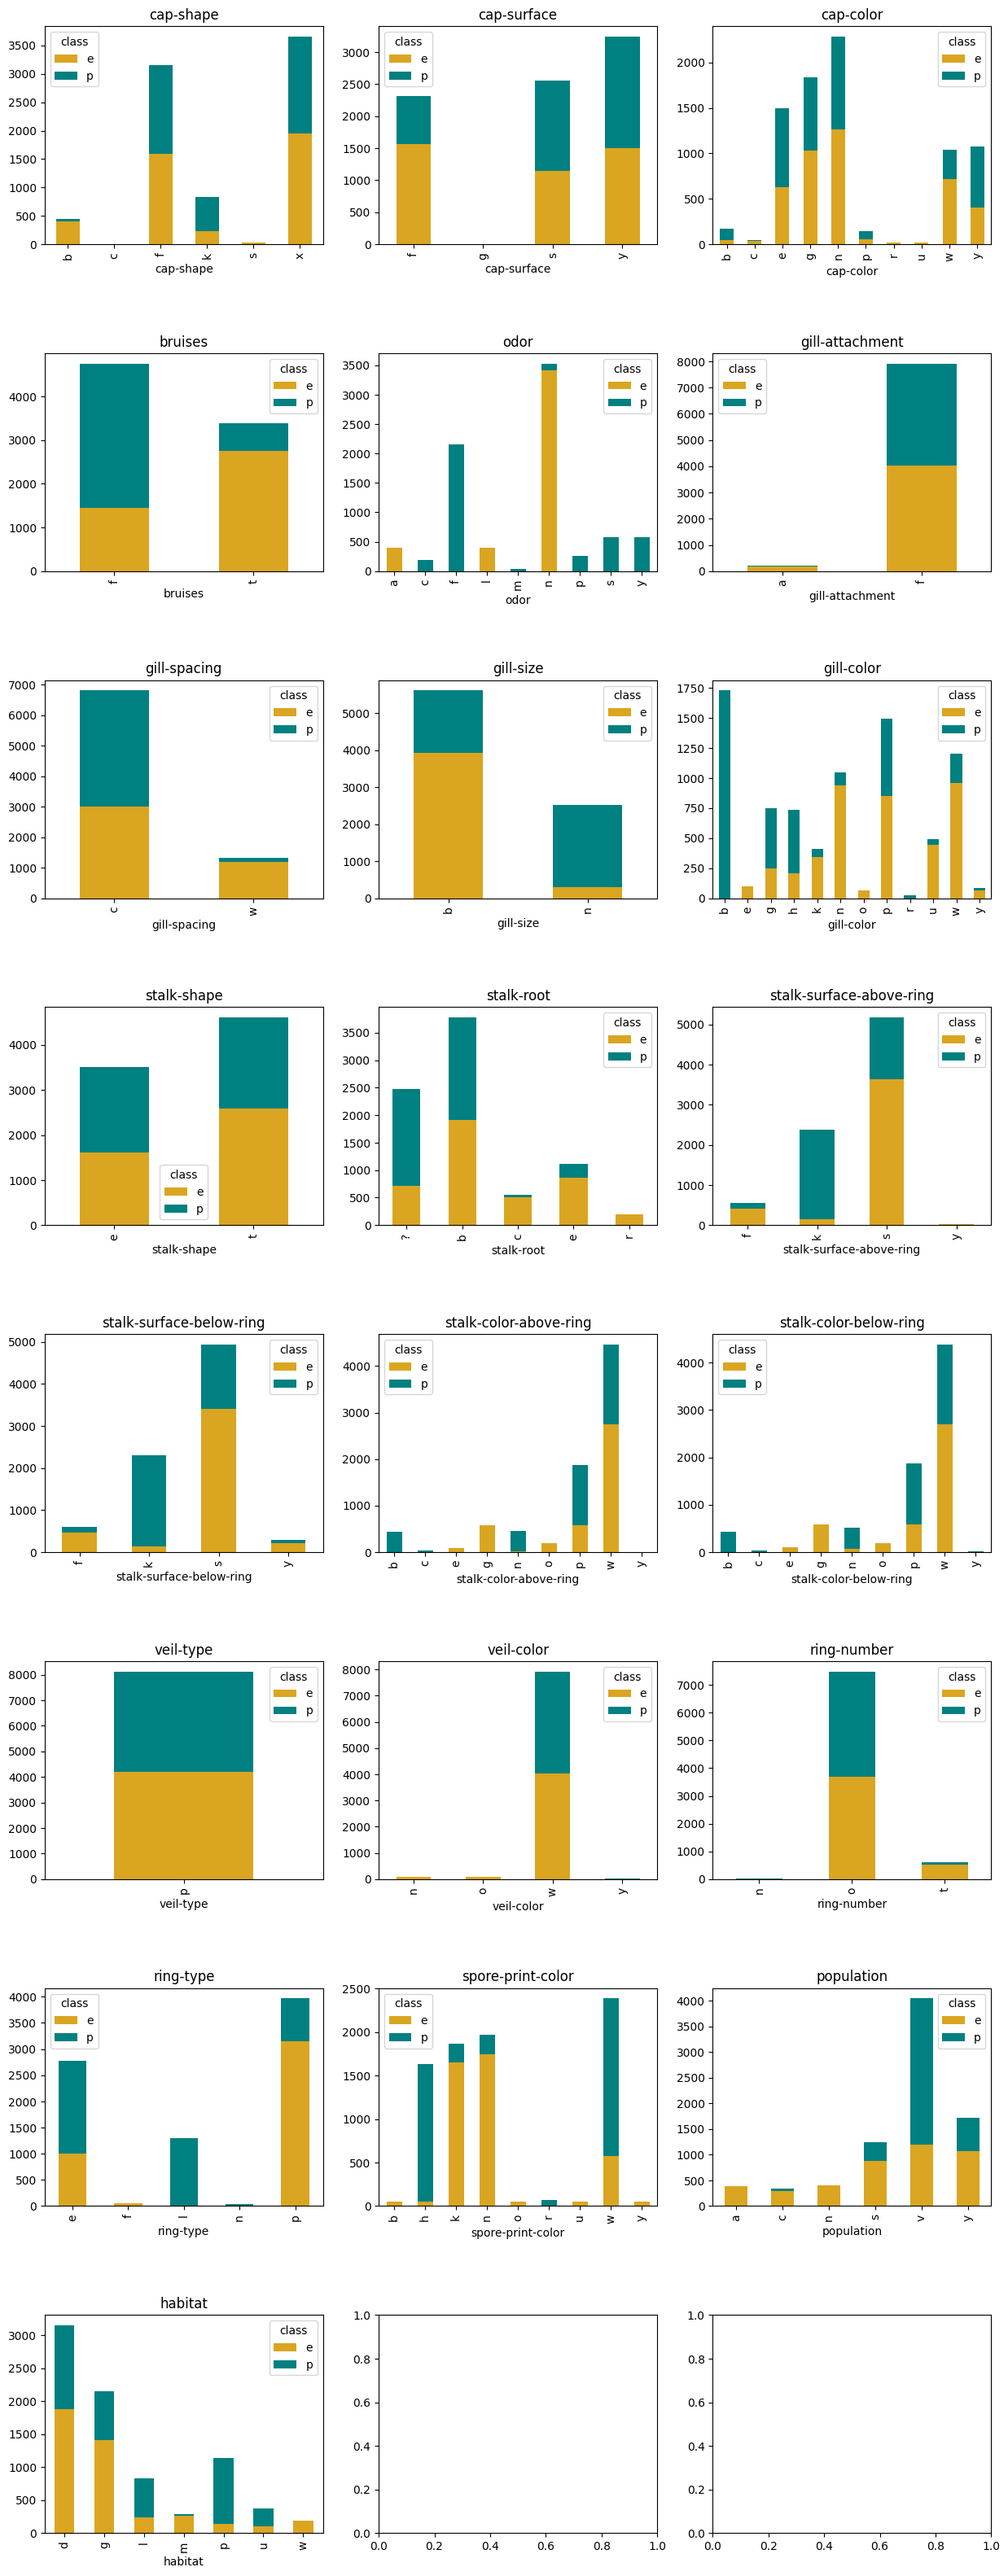

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'class'
feature_columns = [col for col in df.columns if col != target_column]

subplots_per_row = 3
num_rows = 8

# Créez la figure et les sous-tracés
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Itération sur les colonnes de fonctionnalités
for i, column in enumerate(feature_columns):
    # Calculez la position du sous-tracé actuel
    row = i // subplots_per_row
    col = i % subplots_per_row
    
    # Création d'une table de contingence avec pd.crosstab
    crosstab = pd.crosstab(df[column], df[target_column])
    
    # Tracé du graphique de barres pour la table de contingence
    crosstab.plot(kind='bar', stacked=True, ax=axes[row, col], color = ("#DAA520","teal"))
    axes[row, col].set_title(f'{column}')

# Affichez la figure
plt.show()

Avec ces différents graphiques, nous pouvons constater que la variable class n'est pas toujours uniformément répartie selon les modalités de chaque variable, ce qui implique une forte dépendance entre les variables.

## IV) Modèles

In [15]:
#On sépare notre variable CLASS8Pclass_p des variables explicatives
X = dfEncoded.drop("class_p", axis = 1)
y = dfEncoded["class_p"]

In [16]:
# On divise le dataset en train et test pour nos modèles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [17]:
#Standardiser les features
scaler = StandardScaler()
scaler.fit(X_train)
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [18]:
y_train.value_counts()
#Il y a une bonne répartition des modalités de la variable cible

class_p
0    3365
1    3134
Name: count, dtype: int64

In [19]:
y_test.value_counts()
#Il y a une bonne répartition des modalités de la variable cible

class_p
0    843
1    782
Name: count, dtype: int64

Nous pouvons maintenant mettre en place des modèles pour essayer de prédire la variable "class". Nous commençons par modéliser un arbre de décision car c'est un modèle qui, s'il est performant pour prédire la comestibilité des champignons, est facile à interpréter. 

### 1) Arbre de décision

In [20]:
tree = DecisionTreeClassifier(
    max_depth=3, #Profondeur de l'arbre
    min_samples_split=2, #Nombre d'individus pour créer un noeud
    min_samples_leaf=1, #Nombre d'individus pour créer une feuille
    splitter='best', #Choix du split
    random_state=42,
    )

# On entraine notre modèle
tree.fit(X_train_sc, y_train)

# On prédit les valeurs de y pour X_test
y_pred = tree.predict(X_test_sc)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       843
           1       0.96      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



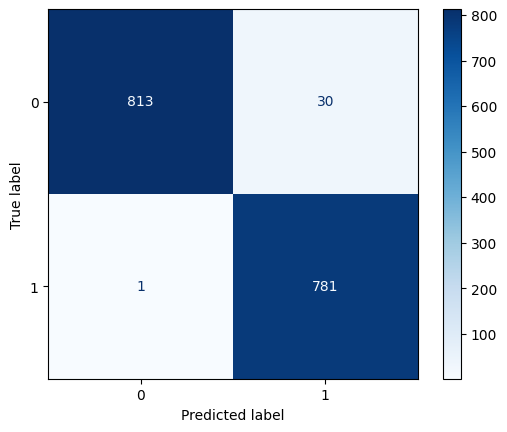

In [21]:
# On fait une matrice de confusion pour voir où le modèle se trompe
cm_tree = evaluate_model(tree, X_test_sc, y_test)
cm_tree

Avec ce premier arbre, nous avons déjà des resultats très intéressants avec une accuracy et un F1_score de 98%. Nous allons donc optimiser les paramètres à l'aide d'un Grid Search afin d'améliorer les performances de l'arbre.

In [22]:
parameter_grid = { #liste des paramètres qui seront tester
    'max_depth': (2, 4, 6, 8, 10),
    'min_samples_split': (2, 4, 6, 8, 10),
    'min_samples_leaf': (1, 2, 3, 4, 5, 6, 7, 8),
    'splitter' : ('best', 'random'),
    'criterion' : ('gini','entropy')
}

tree = DecisionTreeClassifier(random_state=42)

gridSearch_tree = GridSearchCV(estimator=tree,
                param_grid=parameter_grid,
                cv=10,
                n_jobs=-1,
                verbose=1)

In [23]:
#visualisation des résultats
gridSearch_tree.fit(X_train_sc, y_train) #

print(gridSearch_tree.best_score_) # Meilleur score
print(gridSearch_tree.best_params_) # Meilleurs paramètres

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
1.0
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [24]:
#On présente un dataframe qui recense les 5 meilleurs modèles avec leurs paramètres associés
pd.DataFrame(gridSearch_tree.cv_results_
             ).sort_values(by='rank_test_score'
                           ).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
604,0.070831,0.019892,0.006385,0.005284,entropy,6,5,6,best,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
642,0.081762,0.020617,0.003291,0.000778,entropy,8,1,4,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
641,0.116609,0.022199,0.005286,0.006035,entropy,8,1,2,random,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
640,0.059911,0.011919,0.005638,0.007795,entropy,8,1,2,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
339,0.112751,0.029722,0.003857,0.001596,gini,10,2,10,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [25]:
#Enregistrer tous les arbres
results_grid_tree = pd.DataFrame(gridSearch_tree.cv_results_)
results_grid_tree = results_grid_tree.sort_values(by=["rank_test_score"])
results_grid_tree = results_grid_tree.set_index(results_grid_tree["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                  ).rename_axis("kernel")

results_grid_tree[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
# results_grid_tree.to_csv('grid_tree1.csv', index=True, sep = ";")

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
entropy_6_5_6_best,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",1,1.000000,0.000000
entropy_8_1_4_best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",1,1.000000,0.000000
entropy_8_1_2_random,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",1,1.000000,0.000000
entropy_8_1_2_best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",1,1.000000,0.000000
gini_10_2_10_random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1,1.000000,0.000000
...,...,...,...,...
entropy_2_7_6_random,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",721,0.928604,0.006616
entropy_2_7_8_best,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",721,0.928604,0.006616
entropy_2_7_8_random,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",721,0.928604,0.006616


On réalise l'arbre avec les paramètres optimaux.

In [26]:
tree_final = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=3,
    splitter='best',
    criterion='gini',
    random_state=42,
    )

# On entraine notre modèle
tree_final.fit(X_train_sc, y_train)

# On prédit les valeurs de y pour X_test
y_pred = tree_final.predict(X_test_sc)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



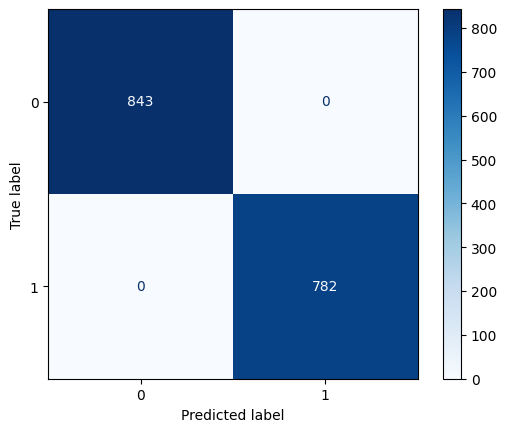

In [27]:
cm_tree_final = evaluate_model(tree_final, X_test_sc, y_test)
cm_tree_final

Avec les paramètres optimisés, l'arbre prédit parfaitement la comestibilité des champignons.
Nous allons aussi présenter un Random Forest pour comparer les résultats avec l'arbre de décision.

### Random Forest

In [28]:
# On crée notre modèle
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            random_state=42)

# On entraine notre modèle
rf.fit(X_train_sc, y_train)

# On prédit les valeurs de la variable cible pour les données de test
y_pred = rf.predict(X_test_sc)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



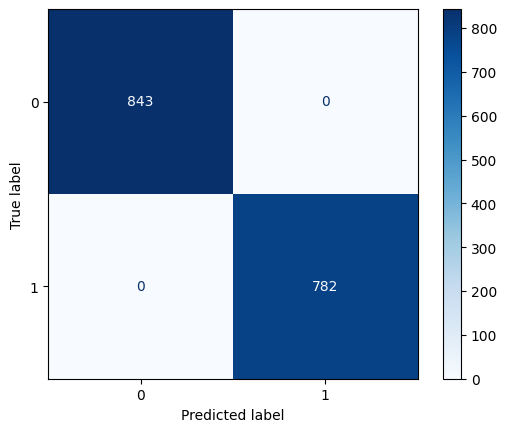

In [29]:
cm_forest = evaluate_model(rf, X_test_sc, y_test)
cm_forest

Cette fois-ci, le modèle prédit parfaitement la comestibilité des champignons, sans Grid Search.

Nous avons donc vu que des modèles basiques peuvent déjà prédire la comestibilité des champignons. Nous pourrions nous arrêter là mais, pour le projet, nous allons modélier un réseau de neurones et un SVM, bien que ces méthodes soient plus complexes qu'un arbre et moins interprétables.

## V) Réseau de neurones

Nous avons commencé par modélisé un réseau de neurones avec 1 seule couche cachée, car, au vu des données, nous ne pensons pas nécessaire de mettre trop de couches cachées pour obtenir de bons résultats prédictifs.

In [30]:
# Le réseau de neurones est constitué d'un couche cachée avec une fonction d'activation "tanh" et une couche de sortie qui sort une valeur avec la fonction d'activation sigmoid
np.random.seed(42)
model0 = Sequential()
model0.add(Dense(50, input_dim = X_train.shape[1], activation="tanh")) # 50 unités de couches cachées
model0.add(Dense(1, activation="sigmoid")) # 1 classe finale
model0.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model0.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4851 (18.95 KB)
Trainable params: 4851 (18.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
history = model0.fit(X_train_sc, y_train, batch_size = 256, epochs = 60, validation_split = 0.2)

Epoch 1/60


21/21 [==============================] - 2s 20ms/step - loss: 0.5586 - accuracy: 0.7173 - val_loss: 0.2715 - val_accuracy: 0.9554
Epoch 2/60
21/21 [==============================] - 0s 6ms/step - loss: 0.1954 - accuracy: 0.9635 - val_loss: 0.1340 - val_accuracy: 0.9738
Epoch 3/60
21/21 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9827 - val_loss: 0.0844 - val_accuracy: 0.9862
Epoch 4/60
21/21 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9938 - val_loss: 0.0589 - val_accuracy: 0.9938
Epoch 5/60
21/21 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9975 - val_loss: 0.0439 - val_accuracy: 0.9962
Epoch 6/60
21/21 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9985 - val_loss: 0.0342 - val_accuracy: 0.9977
Epoch 7/60
21/21 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9996 - val_loss: 0.0274 - val_accuracy: 0.9977
Epoch 8/60
21/21 

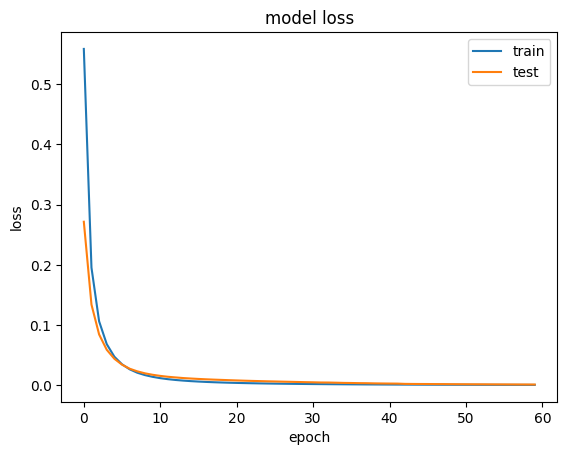

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"], loc = "upper right")
plt.show()

Hormis avant 5 epoch où la courbe test est sous le train, elle est superposée à celle du train, ce qui nous indique que le modèle à bien appris du train et arrive à bien prédire les valeurs du test.

Nous allons mesurer la performance du réseau de neurones à l'aide d'une matrice de confusion et une courbe AUC.

51/51 [==============================] - 0s 975us/step


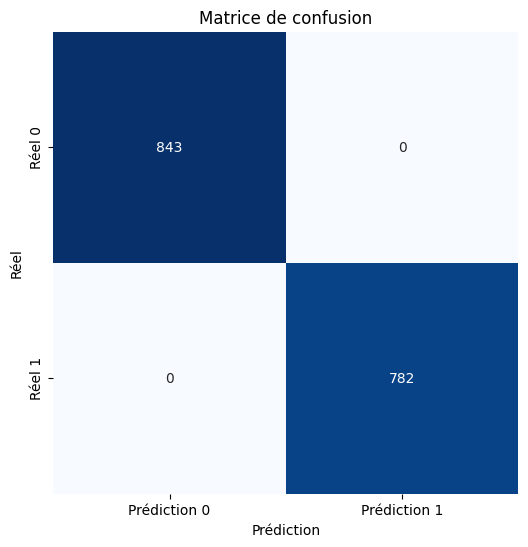

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [36]:
y_pred = (model0.predict(X_test_sc) > 0.5).astype("int32")
#On a pris un threshold de 0.5 mais on le verra avec la courbe de ROC que les résultats sont 
#identiques quelque soit cette valeur (sauf pour 0 et 1 évidemment)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prédiction 0', 'Prédiction 1'],
            yticklabels=['Réel 0', 'Réel 1'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de classification:")
print(classification_report(y_test, y_pred))

La matrice de corrélation nous montre que le réseau de neurones à parfaitement prédit les valeurs du x_test. Avec la fonction d'activation sigmoid, le modèle donne une probabilité d'être un champignon venimeux. On a choisit que si cette probabilité était inférieure à 0.5, alors le modèle doit le classer comme un champignon comestible. Nous allons voir avec la courbe AUC que, quelque soit cette valeur (hormis 0 et 1), les prédictions auraient été les mêmes, ce qui montre que le modèle est robuste.

51/51 [==============================] - 0s 2ms/step


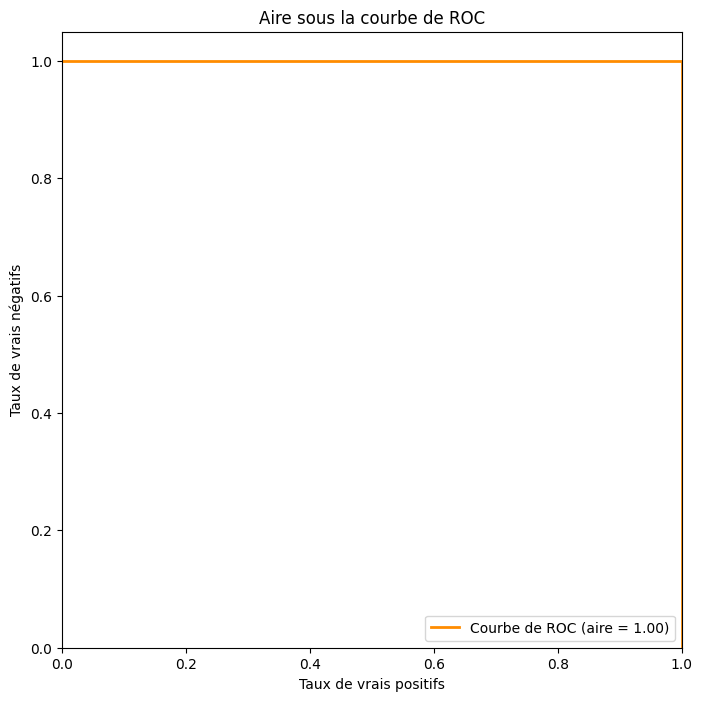

In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = model0.predict(X_test_sc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fpr_inverse = 1 - fpr

# Tracer la courbe ROC inversée
plt.figure(figsize=(8, 8))
plt.plot(tpr, fpr_inverse, color='darkorange', lw=2, label='Courbe de ROC (aire = {:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de vrais positifs')
plt.ylabel('Taux de vrais négatifs')
plt.title('Aire sous la courbe de ROC')
plt.legend(loc="lower right")
plt.show()

La courbe de ROC nous donne un compromis entre Spécificité et Sensibilité. Nous pouvons voir que l'aire sous la courbe est maximale, ce qui signifie que le modèle distingue partaiement les champignons venimeux et comestibles.

## VI) Support Vecteur Machine

Nous allons ici utiliser des modèles pour essayer de séparer linéairement les données. On utilisera 4 modèles différents.

In [38]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
lgr.fit(X_train_sc, y_train)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
l_SVC.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train)

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



SGDClassifier(random_state=42)

In [39]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# On utilise un stratified KFold car cette méthode est plus performante que la cross validation
# et respecte la répartition des modlaités de notre variable à expliquer

cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=stratified_kfold, scoring='accuracy')
cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=stratified_kfold, scoring='accuracy')
cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=stratified_kfold, scoring='accuracy')
cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=stratified_kfold, scoring='accuracy')

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will cha

In [40]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc']
df_cross

,fold1,fold2,fold3,fold4,fold5,model
0,1.000000,1.0,1.000000,1.0,1.0,lgr
1,1.000000,1.0,1.000000,1.0,1.0,lsvc
2,0.997692,1.0,0.998462,1.0,1.0,sgdc
3,1.000000,1.0,1.000000,1.0,1.0,svc


In [41]:
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle n°'+ str(i+1) + ' a une accuray de '  + str(round(mean_model,4)) + ' et un std : ' + str(round(std_model,4)))

Le modèle n°1 a une accuray de 1.0 et un std : 0.0
Le modèle n°2 a une accuray de 1.0 et un std : 0.0
Le modèle n°3 a une accuray de 0.9992 et un std : 0.0011
Le modèle n°4 a une accuray de 1.0 et un std : 0.0


Les meilleurs modèles sont : la régression logistique, le linear SVM et le SGDC Classifier.
Pour la suite, nous nous concentrons sur le modèle SVM linéaire. Nous allons construire une learning curve pour être sûr que le modèle ne sur-apprend pas et pour voir la quantité d'amélioration possible en ajoutant des données.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\mathi\anaconda3\envs\svm_01\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will cha

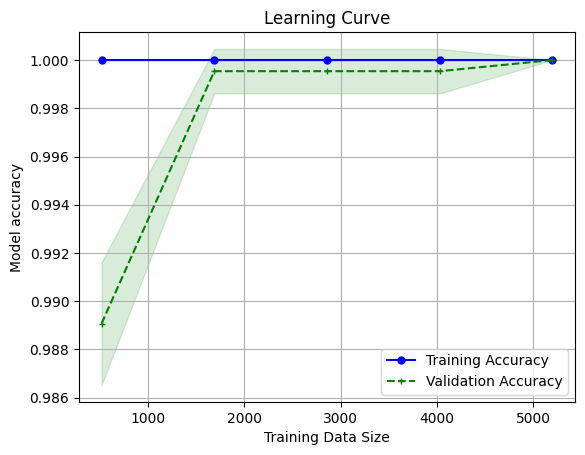

In [42]:
train_sizes, train_scores, test_scores = learning_curve(estimator=l_SVC, 
                                                        X=X_train_sc, 
                                                        y=y_train,
                                                        cv=stratified_kfold, 
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        random_state=42
                                                       )


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Nous pouvons constater que même sur des données qu'il n'a jamais vu, le modèle s'adapte très bien aux données (à partir de 1800 données voire même dès 500 données), ce qui est très positif. Le modèle ne sur-apprend pas. Nous pouvons dès à présent faire un graphique pour voir l'importance desvariables dans le modèle.

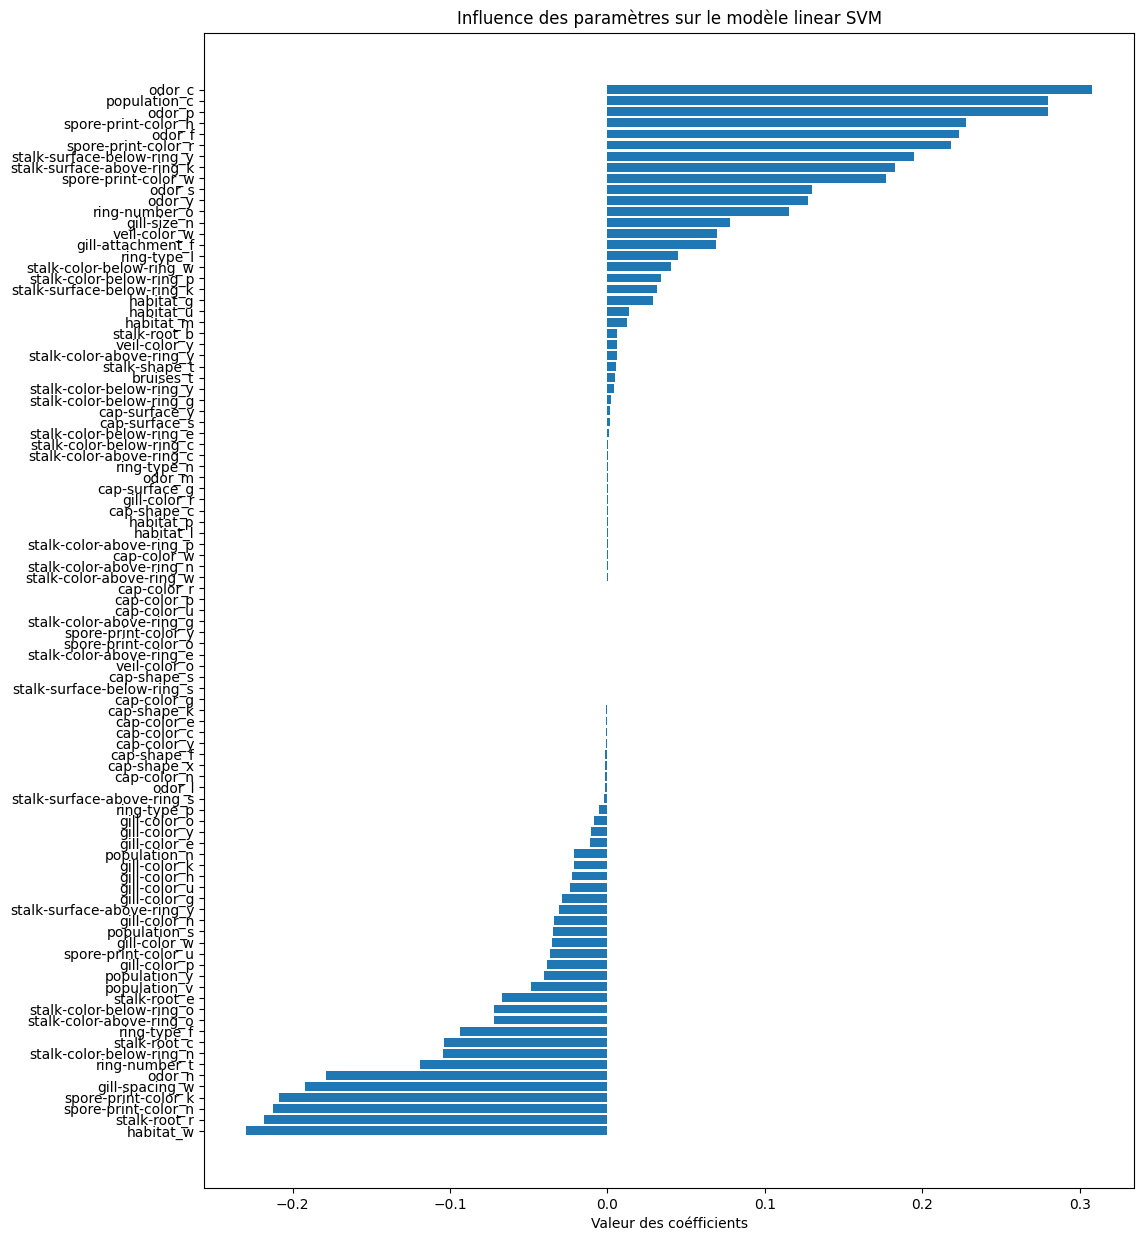

In [43]:
features_names = X.columns
plt.figure(figsize=(12, 15))
plt.title('Influence des paramètres sur le modèle linear SVM')
plt.xlabel('Valeur des coéfficients')
svm_f_importances(l_SVC.coef_[0], features_names)

Les variables qui ont un fort impact (positif) sur le modèle sont : l'odeur (créosote, piquant ou aucune), la population (regroupée) et la couleur de l'impression des spores (jaune, vert, chocolat). 
A l'inverse, les variables qui ont le plus d'importance de manière négative sont : si l'habitat est considéré comme déchet, si la racine est ancrée ou si la couleur de l'impression des spores est marron ou noire.

## VII) Conclusion

Afin de prédire la comestibilité de champignons, nous avons utilisé différentes méthodes de Machine Learning comme l'arbre de décision ou la forêt aléatoire. Nous avons comparé ces méthodes à un réseau de neurones et à un SVM. De part la base de données, il s'est avéré qu'un simple arbre de décision était suffiant pour prédire la comestibilité des champignons. Il n'a donc pas été nécessaire de faire des réseaux de neurones très profond ou d'utiliser des SVM non linéaires.